Laboratorio 1 de programación Regresión Lineal

In [92]:
# Librerias necesarias
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D


In [93]:
# Cargar Google Drive para acceder a los archivos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
# Cargar el dataset desde un archivo CSV en Google Drive
# Reemplaza 'your_dataset.csv' con la ruta y el nombre de tu archivo
data = pd.read_csv('/content/drive/MyDrive/Tareas/Inteligencia artificial SIS420/Agustin/Laboratorios/2017_Yellow_Taxi_Trip_Data.csv')
 # Suponiendo que deseas trabajar con la primera columna para X y una columna específica para y (por ejemplo, la columna 2)
# Convertir las columnas X e y a tipo flotante
X = data.iloc[:, 4].values.astype(float)  # Convertir a float
y = data.iloc[:, 17].values.astype(float)  # Convertir a float

# Tamaño del conjunto de datos
m = y.size

In [95]:
print(X[:5])

[6. 1. 1. 1. 1.]


In [96]:
print(y[:5])

[16.56 20.8   8.75 27.69 17.8 ]


In [97]:
print(f"Number of examples: {m}")

Number of examples: 22699


1.1 Trazar los datos

In [98]:
# Función para graficar los datos
def plotData(x, y):
    fig = pyplot.figure()  # abre una nueva figura
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Etiqueta de y')
    pyplot.xlabel('Etiqueta de X')
    pyplot.title('Gráfico de datos del dataset')


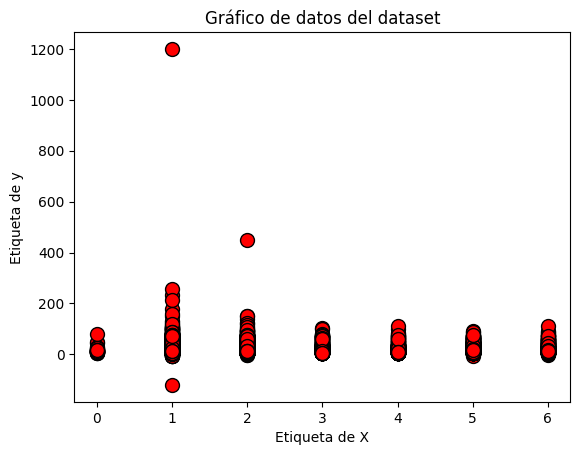

In [99]:
plotData(X, y)

In [100]:
#?pyplot.plot

1.2 Descenso por el gradiente

1.2.2 Implementación

In [101]:
# Agregar una columna de unos a X para el término de intercepción
X = np.stack([np.ones(m), X], axis=1)

In [102]:
print(X)

[[1. 6.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


Calculo del costo

In [103]:
# Cálculo del costo J(θ)
def computeCost(X, y, theta):
    m = y.size  # Número de ejemplos de entrenamiento
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J


Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de  θ .

1.2.4 Descenso por el gradiente

In [104]:
# Función para realizar el descenso por el gradiente
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # cost = computeCost(X, y, theta)
        J_history.append(computeCost(X, y, theta))
        # print(f"Iteración {i+1}/{num_iters}: Costo = {cost:.6f}, Theta = {theta}")
    return theta, J_history


In [105]:
# Inicializar los parámetros
theta = np.zeros(2)
iterations = 12500
alpha = 0.003

# Ejecutar el descenso por el gradiente e imprimir los resultados
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print('\nTheta final encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))



Theta final encontrada por descenso gradiente: 16.1516, 0.0968


In [109]:
# # Graficar la evolución del costo a lo largo de las iteraciones
# plt.plot(np.arange(len(J_history)), J_history, lw=2)
# plt.xlabel('Número de iteraciones')
# plt.ylabel('Costo J')
# plt.title('Evolución del Costo durante el Descenso por Gradiente')
# plt.show()

Se utilizan los parametros finales para grafical la linea.

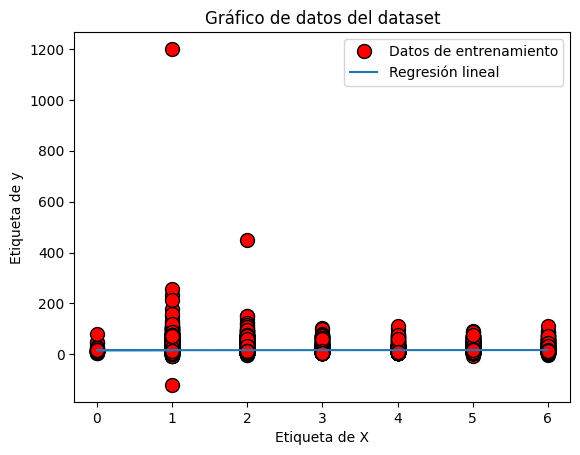

In [106]:
# Graficar los datos y la línea de regresión
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión lineal'])

1.4 Visualizar  J(θ)

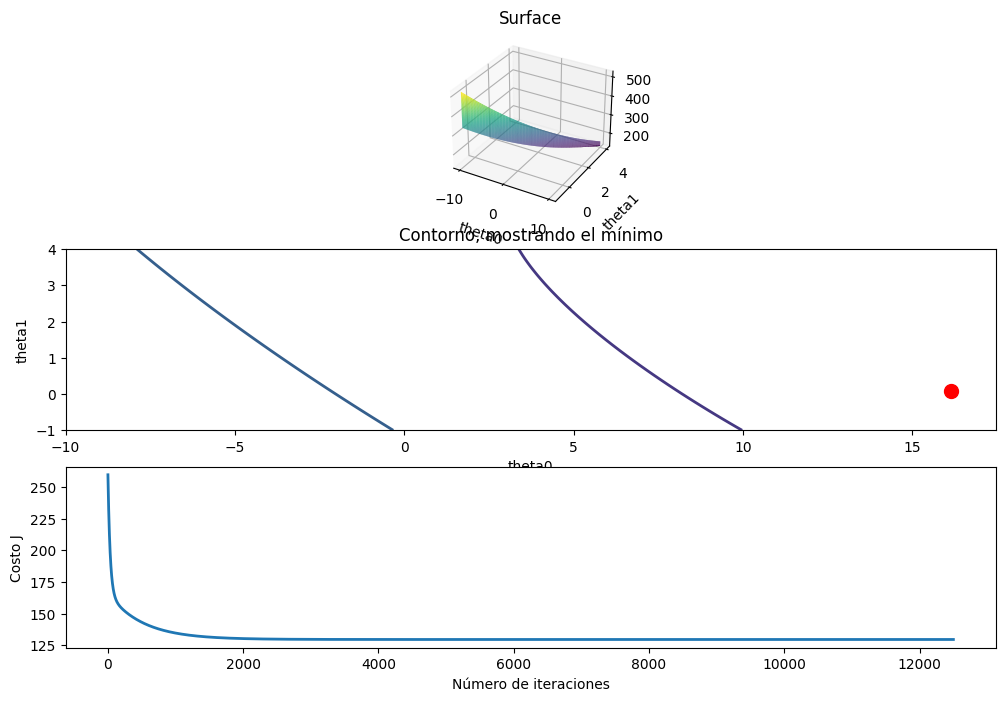

In [107]:


# Visualizar la función de costo J(θ) en 3D
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

J_vals = J_vals.T

fig = pyplot.figure(figsize=(12, 8))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el mínimo')

ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')

pyplot.show()